<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 10 – GLOBAL THRESHOLDING**

Nama         : Rizqi Rohmatul Huda

Kelas        : TI-3C

Nomor Absen  : 21

NIM          : 2141720264

### **D. TUGAS PRAKTIKUM**

**Mengakses file dari google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [2]:
pip install pytesseract

In [3]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image


3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

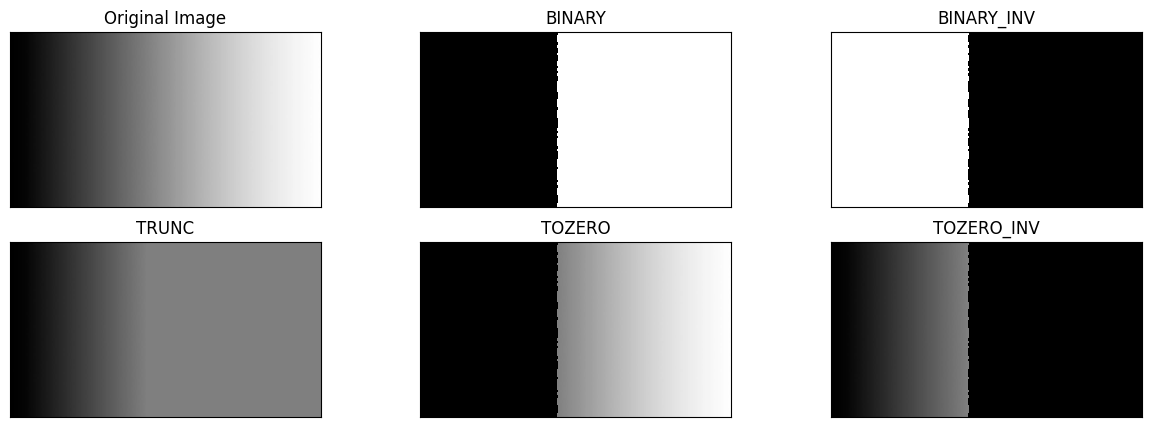

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/img_python/content/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh = 127

ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

# Fungsi Otsu's Thresholding
def otsu_thresholding(image):
    # Normalisasi histogram
    hist = np.histogram(image, bins=256, range=(0, 256))[0].astype(float)
    hist /= hist.sum()

    maximum = 0
    threshold = 0
    sum_b = 0
    sum_f = np.dot(np.arange(256), hist)
    for t in range(256):
        w_b = np.sum(hist[:t])
        w_f = 1 - w_b
        if w_b == 0 or w_f == 0:
            continue
        sum_b += t * hist[t]
        m_b = sum_b / w_b
        m_f = (sum_f - sum_b) / w_f
        between_class_variance = w_b * w_f * (m_b - m_f) ** 2
        if between_class_variance > maximum:
            maximum = between_class_variance
            threshold = t

    return threshold


Nilai threshold dari Otsu's Thresholding: 171


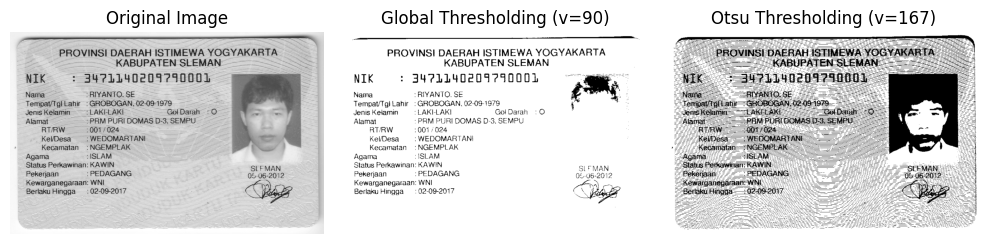

In [6]:

# Path file gambar
image_path = '/content/drive/MyDrive/img_python/content/img_week10/Riyanto.png'

# Baca gambar dari path
image = np.array(Image.open(image_path).convert("L"))

# Global Thresholding dengan v=90
global_threshold = global_thresholding(image, 90)

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)

# Tampilkan gambar dan hasil thresholding
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_threshold, cmap='gray')
plt.title('Global Thresholding (v=90)')
plt.axis('off')

plt.subplot(1, 3, 3)
otsu_binary = np.zeros_like(image)
otsu_binary[image > otsu_threshold] = 255
plt.imshow(otsu_binary, cmap='gray')
plt.title('Otsu Thresholding (v=167)')
plt.axis('off')

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)
print("Nilai threshold dari Otsu's Thresholding:", otsu_threshold)


plt.tight_layout()
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image **ktp Riyanto.jpg** yang sudah disediakan di folder images Petunjuk:


> a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

> b. Buka link berikut [link text](https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html)

> c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).










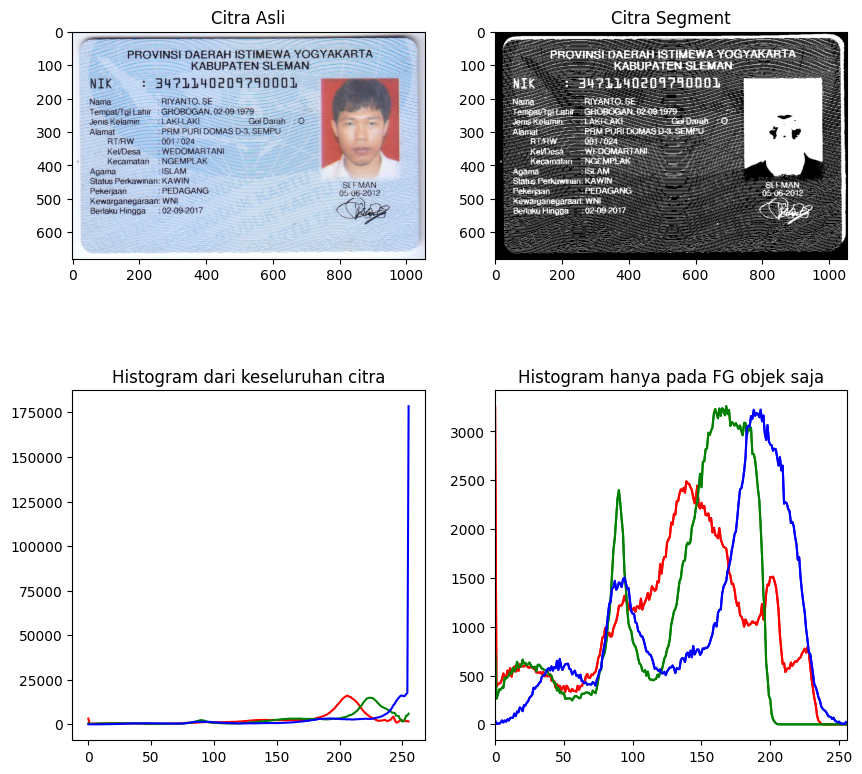

In [11]:
pict_3 = '/content/drive/MyDrive/img_python/content/img_week10/Riyanto.png'
img_l = cv2.imread(pict_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

6. Lakukan segmentasi warna pada image " **ktp Riyanto.jpg** ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)


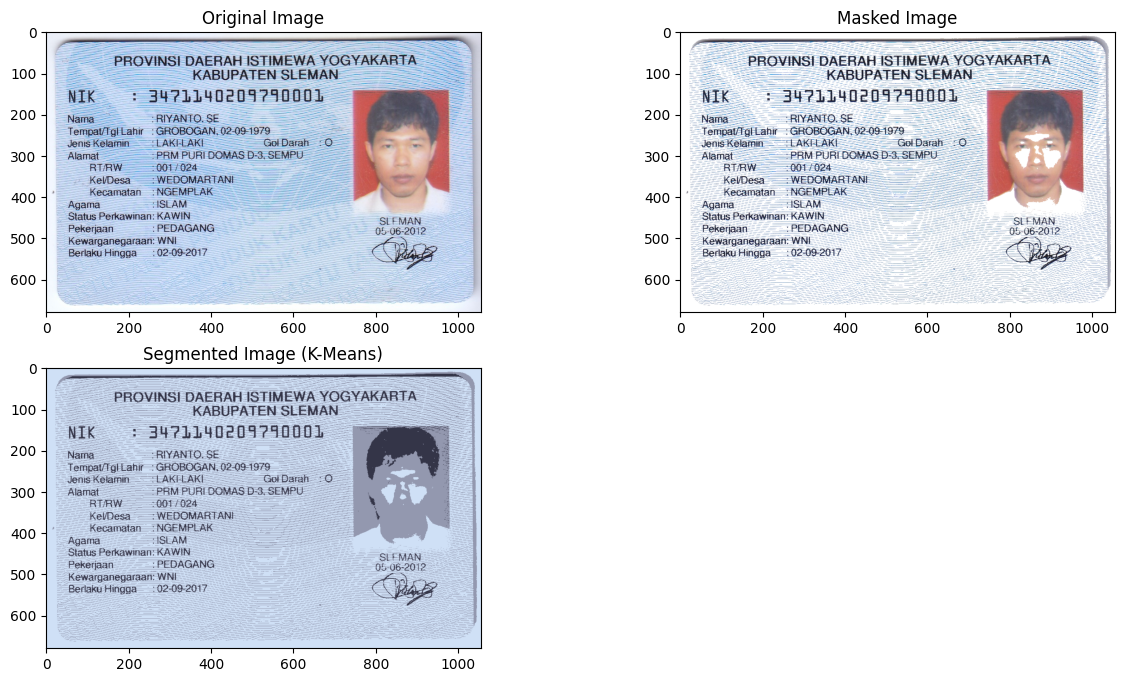

In [15]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/img_python/content/img_week7/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

### **E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.**

1. Install PIP OCR

In [17]:
pip install pytesseract

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()
3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file
4. Menambahkan kotak untuk deteksi teksi pada gambar

In [18]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import cv2


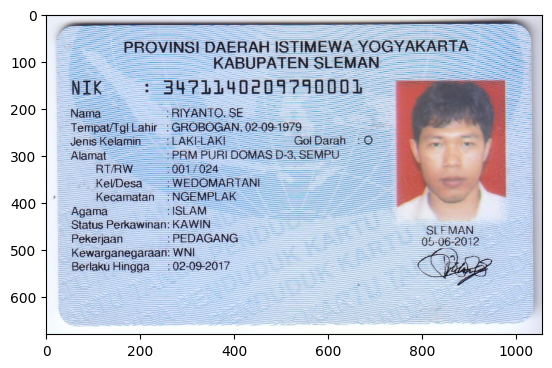

In [19]:
img_path = '/content/drive/MyDrive/img_python/content/img_week10/Riyanto.png'
image = Image.open(img_path)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image)
plt.show()


In [22]:
text = pytesseract.image_to_string(image)
print("Teks yang dikenali dari gambar KTP:")
print(text)


TesseractNotFoundError: ignored